In [43]:
##### importing required libraries 


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups


In [25]:
######## fetching data according to requirement

categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics', 'talk.politics.misc']


data = fetch_20newsgroups(categories=categories, remove=('headers', 'footers'))
data.target_names

['comp.graphics',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.misc',
 'talk.religion.misc']

In [44]:
data_df = pd.DataFrame([data.data, data.target.tolist()]).T
data_df.columns = ['text', 'target']

targets = pd.DataFrame(data.target_names)
targets.columns=['title']

news_data = pd.merge(data_df, targets, left_on='target', right_index=True)
news_data.head().reset_index()

,index,text,target,title
0,0,In <1993Apr2.125134.3780@hemlock.cray.com> rja...,3,talk.politics.misc
1,9,In article <1993Apr15.170731.8797@isc-br.isc-b...,3,talk.politics.misc
2,25,In article <15APR199320293386@utkvx.utk.edu> d...,3,talk.politics.misc
3,40,In article <1993Apr15.215912.1807@martha.utcc....,3,talk.politics.misc
4,45,The following was posted and no doubt retyped ...,3,talk.politics.misc


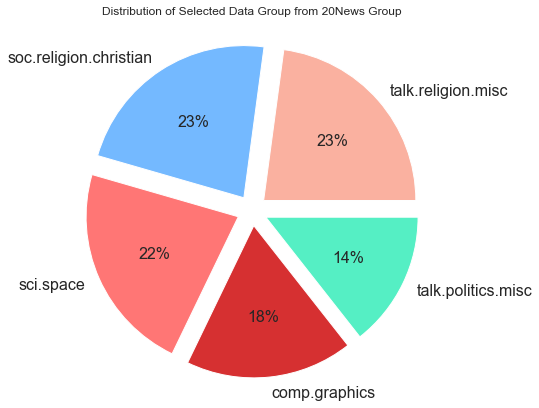

In [45]:
size = news_data.target.value_counts()
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
custom_colors = ['#fab1a0', '#74b9ff', '#ff7675', '#d63031', '#55efc4']



plt.figure(figsize=(7,7))
plt.pie(size, autopct='%1.0f%%', explode=explode, labels=categories, textprops={'fontsize' : 16}, colors=custom_colors)
plt.title("Distribution of Selected Data Group from 20News Group")
plt.show()

In [26]:

####### Training Data subset
train = fetch_20newsgroups(subset='train', categories=categories)


####### Test Data subset
test = fetch_20newsgroups(subset='test', categories=categories)


In [27]:
train.data[1]

'From: leech@cs.unc.edu (Jon Leech)\nSubject: Space FAQ 09/15 - Mission Schedules\nSupersedes: <schedule_730956538@cs.unc.edu>\nOrganization: University of North Carolina, Chapel Hill\nLines: 177\nDistribution: world\nExpires: 6 May 1993 19:59:07 GMT\nNNTP-Posting-Host: mahler.cs.unc.edu\nKeywords: Frequently Asked Questions\n\nArchive-name: space/schedule\nLast-modified: $Date: 93/04/01 14:39:23 $\n\nSPACE SHUTTLE ANSWERS, LAUNCH SCHEDULES, TV COVERAGE\n\n    SHUTTLE LAUNCHINGS AND LANDINGS; SCHEDULES AND HOW TO SEE THEM\n\n    Shuttle operations are discussed in the Usenet group sci.space.shuttle,\n    and Ken Hollis (gandalf@pro-electric.cts.com) posts a compressed version\n    of the shuttle manifest (launch dates and other information)\n    periodically there. The manifest is also available from the Ames SPACE\n    archive in SPACE/FAQ/manifest. The portion of his manifest formerly\n    included in this FAQ has been removed; please refer to his posting or\n    the archived copy. F

In [28]:
test.data[1]

"From: prb@access.digex.net (Pat)\nSubject: Re: HST Servicing Mission Scheduled for 11 Days\nDistribution: na\nOrganization: Express Access Online Communications USA\nLines: 75\nNNTP-Posting-Host: access.digex.net\n\nIn article <1993Apr30.101054.1@stsci.edu> hathaway@stsci.edu writes:\n>In article <1rq3os$64i@access.digex.net>, prb@access.digex.net (Pat) writes:\n>> In article <3t75nhg@rpi.edu> strider@clotho.acm.rpi.edu (Greg Moore) writes:\n|> |\n|> |\tAs Herny pointed out, you have to develop the thruster.\n|> |Also, while much lighter, you still have to lift the mass of\n|> |the thruster to orbit, and then the thruster lifts its own \n|> |weight into a higher orbit.  And you take up room in the payload\n|>>bay.\n|>>\n|> \n|> a yes,  but the improvement in  boost orbit to the HST is Significant,\n|\n|I do not understand what you are saying here.  What is improved, what \n|is Significant, and what does this have to do with carrying more \n|equipment on a servicing mission?  Also, as 

In [29]:
#### import libraries to build text classifaction model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [35]:
###### Creating model Based on Multinomial Naive bayes


model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [36]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [38]:
labels = model.predict(test.data)

Text(44.493125, 0.5, 'Predictied Label')

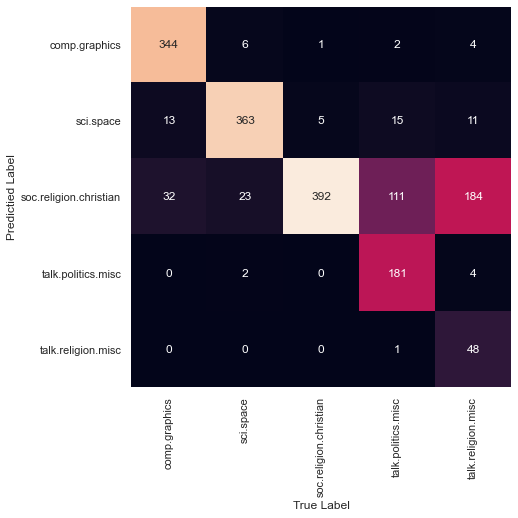

In [51]:
from sklearn.metrics import confusion_matrix
mat =  confusion_matrix(test.target, labels)
plt.figure(figsize = (7,7))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = train.target_names,
            yticklabels=train.target_names)

#### plotting Heatmap of confusion matrix

plt.xlabel('True Label')
plt.ylabel('Predictied Label')

In [63]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [64]:
predict_category('jesus can turn water into wine')

'soc.religion.christian'

In [66]:
predict_category('president can meet us today')

'talk.politics.misc'